In [1]:
#import the libraries 
%matplotlib inline 

import numpy as np 
import matplotlib.pyplot as plt 

In [8]:
#generating the data set 
def generate_examples(num = 1000):
    W = [1.0, -3.0]
    b = 1.0
    
    W = np.reshape(W, (2,1))
    
    X = np.random.randn(num, 2)
    
    y = b + np.dot(X, W) + np.random.randn()
     
    y = np.reshape(y, (num, 1))
    
    return X, y

In [9]:
X, y = generate_examples()

In [10]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [11]:
print(X[0], y[0])

[-1.56892202  0.96880454] [-2.62941222]


In [12]:
#create the model class
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

In [13]:
model = Model(2)
print(model.W)
print(model.b)

[[-1.38007093]
 [ 0.59138693]]
0.20722006307379384


In [15]:
#forward pass
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [16]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape)

(1000, 1)


In [20]:
#compute loss
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        loss = np.sum(np.square(y_hat - y_true))/(2*y_true.shape[0])
        return loss

In [21]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [22]:
loss

13.840944687934424

In [23]:
#backward pass :
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        db = (1/m)*np.sum(y_hat - y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis = 0)
        return dW, db

In [24]:
model = Model(2)

X, y = generate_examples()

y_hat = model.forward_pass(X)

dW, db = model.backward_pass(X, y, y_hat)

In [25]:
print(dW, db)

[-0.90302445  3.22916408] -1.9601598464334087


In [26]:
#update parameters 
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - lr*db

In [30]:
#training loop
class Model(Model):
    def train(self,  x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0 :
                print('Iter : {} , Loss : {:.4f}'.format(i, loss))
        return losses

In [31]:
model = Model(2)

In [32]:
x_train, y_train = generate_examples()

In [34]:
losses = model.train(x_train, y_train, 1001, 3e-3)

Iter : 0 , Loss : 0.0389
Iter : 100 , Loss : 0.0217
Iter : 200 , Loss : 0.0122
Iter : 300 , Loss : 0.0068
Iter : 400 , Loss : 0.0038
Iter : 500 , Loss : 0.0021
Iter : 600 , Loss : 0.0012
Iter : 700 , Loss : 0.0007
Iter : 800 , Loss : 0.0004
Iter : 900 , Loss : 0.0002
Iter : 1000 , Loss : 0.0001


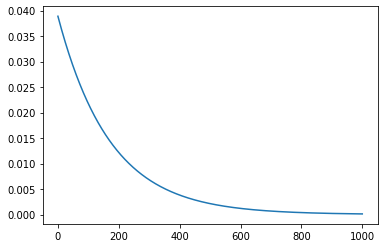

In [35]:
plt.plot(losses);

In [39]:
#predictions
model_untrained = Model(2)

x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [40]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

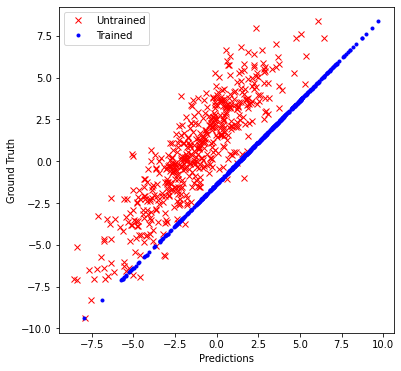

In [41]:
plt.figure(figsize = (6,6))
plt.plot(preds_untrained, y_test, 'rx', label = 'Untrained')
plt.plot(preds_trained, y_test, 'b.', label = 'Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()